In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("talk")

<h3>1. How many tennis players are included in the dataset?</h3>

In [3]:
columns_to_select = ['match_id', 'player_id']
match_home_df = pd.read_parquet('../data/raw/parquets/match_home_team.parquet', engine='pyarrow', columns=columns_to_select)
match_away_team_df = pd.read_parquet('../data/raw/parquets/match_away_team.parquet', engine='pyarrow', columns=columns_to_select)

In [4]:
print(match_home_df.head(), '\n')
print(match_away_team_df.head())

   match_id  player_id
0  11998445     287803
1  11998446      62790
2  11998447      64580
3  11998448     131442
4  11998449      22218 

   player_id  match_id
0     192013  11998445
1     273680  11998446
2      77223  11998447
3      88992  11998448
4     248846  11998449


In [5]:
print('match_home shape:', match_home_df.shape)
print('match_away shape:', match_away_team_df.shape)

match_home shape: (12389, 2)
match_away shape: (11690, 2)


In [6]:
concat_df = pd.concat([match_home_df, match_away_team_df])

In [7]:
print('Number of duplicates:', concat_df.duplicated().sum())
print('player_id nulls:', concat_df['player_id'].isnull().sum())

Number of duplicates: 0
player_id nulls: 0


In [8]:
print('Number of unique players:', concat_df['player_id'].nunique())

Number of unique players: 2644


In [9]:
del match_home_df, match_away_team_df, concat_df

<h3>8. Is there a difference in the number of double faults based on gender?</h3>

In [28]:
columns_to_select = ['match_id', 'gender']
statistics_df = pd.read_parquet('../data/raw/parquets/statistics_statistics.parquet', columns=['match_id', 'statistic_name'])
match_away_df = pd.read_parquet('../data/raw/parquets/match_away_team.parquet', columns=columns_to_select)
match_home_df = pd.read_parquet('../data/raw/parquets/match_home_team.parquet', columns=columns_to_select)

In [29]:
statistics_df.head()

,match_id,statistic_name
0,11998445,aces
1,11998445,double_faults
2,11998445,first_serve
3,11998445,second_serve
4,11998445,first_serve_points


In [30]:
statistics_df.shape

(665589, 2)

In [31]:
concat_home_away_df = pd.concat([match_away_df, match_home_df])
concat_home_away_df.head()

,match_id,gender
0,11998445,M
1,11998446,M
2,11998447,M
3,11998448,M
4,11998449,M


In [32]:
statistics_df_filtered = statistics_df.loc[
    statistics_df['statistic_name'] == 'double_faults'
]

In [33]:
stats_matches_merged = pd.merge(statistics_df_filtered, concat_home_away_df, how='inner', on='match_id')

In [34]:
double_fault_dist_gender_df = stats_matches_merged['gender'].value_counts().reset_index()
double_fault_dist_gender_df['gender'] = double_fault_dist_gender_df['gender'].map({'M': 'Male', 'F': 'Female'})
double_fault_dist_gender_df

,gender,count
0,Male,36761
1,Female,28526


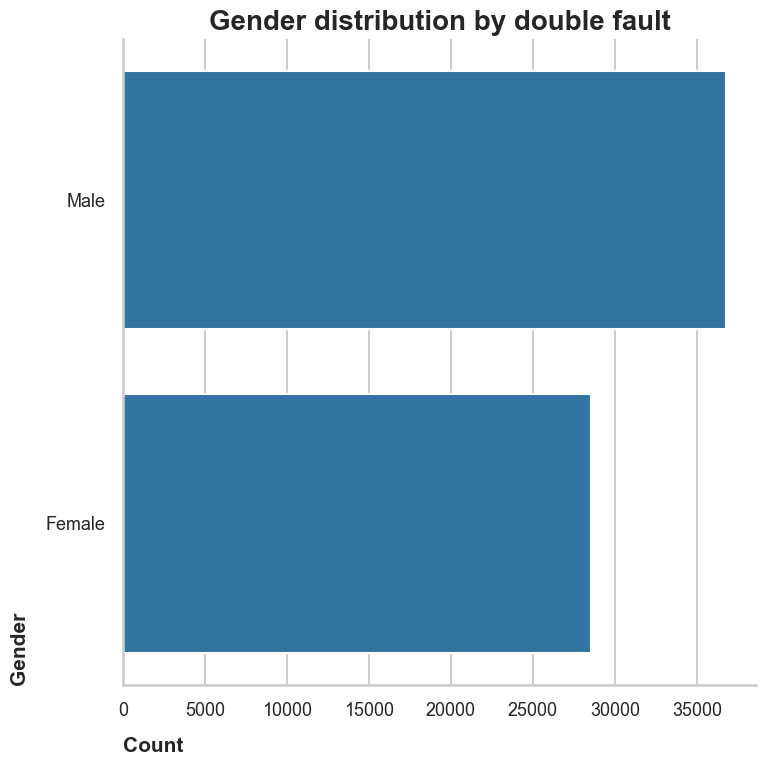

In [35]:
plt.figure(figsize=(8, 8))
sns.barplot(double_fault_dist_gender_df, x='count', y='gender')
plt.title(f'Gender distribution by double fault', fontweight='bold', fontsize=20)
plt.xlabel('Count', fontsize=15, fontweight='bold', loc='left', labelpad=12)
plt.ylabel('Gender', fontsize=15, fontweight='bold', loc='bottom', labelpad=12)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
sns.despine()
plt.tight_layout()
plt.show()

In [36]:
del statistics_df, match_away_df, match_home_df, concat_home_away_df\
    ,statistics_df_filtered, double_fault_dist_gender_df, stats_matches_merged

<h3>9. Which player has won the most tournaments in a single month?</h3>

<h3>10. Is there a correlation between a player's height and their ranking?</h3>

In [3]:
columns_to_select = ['player_id', 'height', 'current_rank']
match_home_df = pd.read_parquet('../data/raw/parquets/match_home_team.parquet', engine='pyarrow', columns=columns_to_select)
match_away_team_df = pd.read_parquet('../data/raw/parquets/match_away_team.parquet', engine='pyarrow', columns=columns_to_select)

In [4]:
print(match_away_team_df.shape)
print(match_home_df.shape)

(11690, 4)
(12389, 4)


In [5]:
match_home_new_cols_name = [f'{col}_match_home' if col != 'player_id' else 'player_id' for col in match_home_df.columns]
match_away_new_cols_name = [f'{col}_match_away' if col != 'player_id' else 'player_id' for col in match_away_team_df.columns]

match_home_df.rename(columns=dict(zip(match_home_df.columns, match_home_new_cols_name)), inplace=True)
match_away_team_df.rename(columns=dict(zip(match_away_team_df.columns, match_away_new_cols_name)), inplace=True)

In [6]:
print(match_home_df.columns)
print(match_away_team_df.columns)

Index(['match_id_match_home', 'player_id', 'height_match_home',
       'current_rank_match_home'],
      dtype='object')
Index(['match_id_match_away', 'player_id', 'height_match_away',
       'current_rank_match_away'],
      dtype='object')


In [7]:
df_merged = pd.merge(match_home_df, match_away_team_df, how='inner', on='player_id')

In [16]:
df_merged.head()

,match_id_match_home,player_id,height_match_home,current_rank_match_home,match_id_match_away,height_match_away,current_rank_match_away
0,11998445,287803,1.83,86.0,12095972,1.83,86.0
1,11998445,287803,1.83,86.0,12098028,1.83,83.0
2,11998445,287803,1.83,86.0,12102035,1.83,86.0
3,11998446,62790,1.80,99.0,12010830,1.80,99.0
4,11998446,62790,1.80,99.0,12040230,1.80,104.0


In [8]:
df_merged.shape

(63492, 7)

In [9]:
print('Number of duplicates:', df_merged.duplicated().sum())

Number of duplicates: 0


In [10]:
df_merged.isnull().sum()

match_id_match_home            0
player_id                      0
height_match_home          25027
current_rank_match_home      373
match_id_match_away            0
height_match_away          25023
current_rank_match_away      389
dtype: int64

In [11]:
df_merged['height_match_home'] = df_merged['height_match_home'].fillna(df_merged['height_match_away'])
df_merged['height_match_away'] = df_merged['height_match_away'].fillna(df_merged['height_match_home'])

In [12]:
df_merged.isnull().sum()

match_id_match_home            0
player_id                      0
height_match_home          24899
current_rank_match_home      373
match_id_match_away            0
height_match_away          24899
current_rank_match_away      389
dtype: int64

In [53]:
df_merged = df_merged[['player_id', 'height_match_home', 'current_rank_match_away']]
df_merged.columns = ['player_id', 'height', 'current_rank']
df_merged.drop_duplicates(inplace=True)
df_merged.dropna(inplace=True)

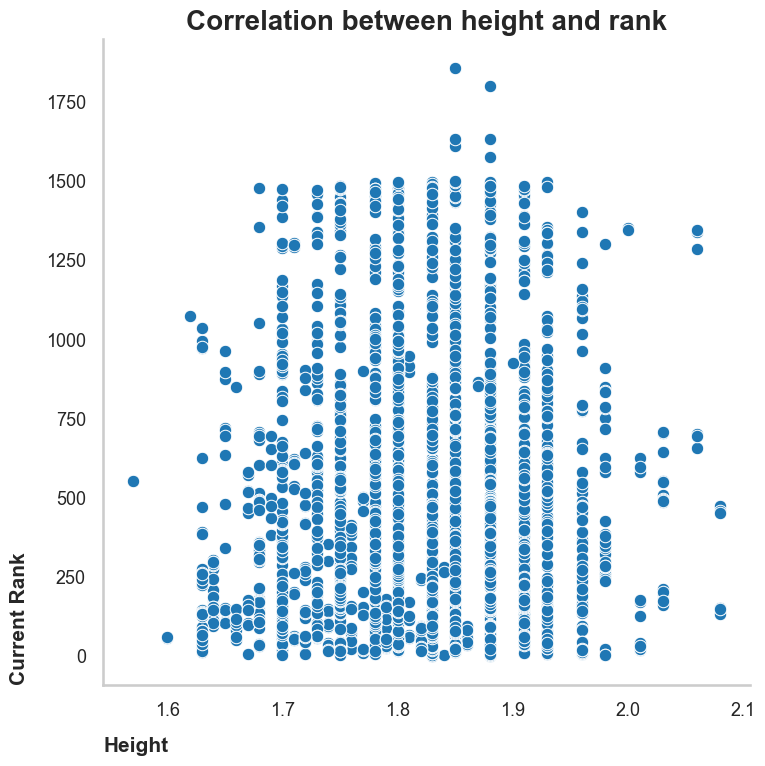

In [60]:
plt.figure(figsize=(8, 8))
sns.scatterplot(df_merged, x='height', y='current_rank')
plt.title(f'Correlation between height and rank', fontweight='bold', fontsize=20)
plt.xlabel('Height', fontsize=15, fontweight='bold', loc='left', labelpad=12)
plt.ylabel('Current Rank', fontsize=15, fontweight='bold', loc='bottom', labelpad=12)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
sns.despine()
plt.grid()
plt.tight_layout()
plt.show()

In [37]:
del match_home_df, match_away_team_df, df_merged

NameError: name 'match_home_df' is not defined

<h3>11. What is the average duration of matches?</h3>

<h3>12. What is the average number of games per set in men's matches compared to women's 
matches? </h3>